# CS524 HW3 Network Flows and Duality

## Q1. Car_Rental

In this question, the decision variables are the number of cars move between agencies. The constraints are the cars in each agency should be no fewer than the required amount. And the objective is to minimize the transport fee.

\begin{align}
\underset{N}{\text{minimize}} \qquad& \sum{DN}  \\
\text{subject to:}\qquad& Nx > b \\ 
\qquad& N_{ij} + N_{ji} = 0
\end{align}
{D is the distance matrix, x is the vector of agencies, N is the car flow matrix, b is the vector of required car number at each agency}

In [21]:
function distance(loc_1, loc_2)
    d = (loc_1 - loc_2);
    return (d'*d)^0.5;
end

distance (generic function with 1 method)

In [27]:
# Here are the data from the sheet
loc_x = [0 20 18 30 35 33 5 5 11 2];
loc_y = [0 20 10 12 0 25 27 10 0 15];
location = [loc_x; loc_y]

require = [10 6 8 11 9 7 15 7 9 12]';
present = [8 13 4 8 12 2 14 11 15 7]';

N = 10; # 10 agencies
fee = 0.5; # per mile

fee_matrix = zeros((N,N));
for i = 1:N
    for j = 1:N
        fee_matrix[i,j] = distance(location[:,i], location[:,j]) * 0.5 * 1.3;
    end
end



In [28]:
using Clp, JuMP
m = Model(with_optimizer(Clp.Optimizer));


@variable(m, car_flow[1:N,1:N]);
@variable(m,cost[1:N,1:N] >= 0);

for i = 1:N
    @constraint(m, car_flow[i,i] == 0);
    for j = 1:N   
        @constraint(m, car_flow[i,j] == -car_flow[j,i]);
        @constraint(m, cost[i,j] >= (car_flow[i,j]) * fee_matrix[i,j]);
              
    end    
    @constraint(m, sum(car_flow[i,:]) >= require[i] - present[i]);
end

@objective(m, Min, sum(cost));
optimize!(m);


Coin0506I Presolve 100 (-120) rows, 135 (-65) columns and 270 (-220) elements
Clp0006I 0  Obj 0 Primal inf 19.999994 (6)
Clp0006I 31  Obj 92.802155 Primal inf 37.999992 (8)
Clp0006I 49  Obj 152.63902
Clp0006I 49  Obj -6.9451564e+11 Primal inf 8.166668e+11 (20) Dual inf 9.43e+14 (54) w.o. free dual inf (46)
Clp0006I 61  Obj 152.63902
Clp0000I Optimal - objective value 152.63902
Coin0511I After Postsolve, objective 152.63902, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 152.6390163 - 61 iterations time 0.002, Presolve 0.00


In [29]:
round.(Int,value.(car_flow))

10×10 Array{Int64,2}:
  0  0   0   0  0   0   0   0  2   0
  0  0  -1   0  0  -5  -1   0  0   0
  0  1   0   0  0   0   0   0  3   0
  0  0   0   0  3   0   0   0  0   0
  0  0   0  -3  0   0   0   0  0   0
  0  5   0   0  0   0   0   0  0   0
  0  1   0   0  0   0   0   0  0   0
  0  0   0   0  0   0   0   0  1  -5
 -2  0  -3   0  0   0   0  -1  0   0
  0  0   0   0  0   0   0   5  0   0

In [31]:
println("The minimum cost is -> \$", round(objective_value(m), digits = 3))

The minimum cost is -> $152.639


### Conclusion:
The moving strategy is list as the matrix shown above.

## Q2. The Chess problem

In this question, the decision variables are the number of larger and smaller sets. The constraints are as follows. First, the total fabrication time cannot be more than 160 hrs per week. Second, the total boxwood cannot exceed 200 kg per week. The objective is to achieve the maximal profit.

Variables -> $s$(small set),$l$(large set);  

\begin{align}
\underset{s,l}{\text{maximize}} \qquad& (5s + 8l) \\
\text{subject to:}\qquad& 3s + 2l \le 160  && \text{(constraint 1)}\\
& s + 4l \le 200 && \text{(constraint 2)}\\
& s\ge 0,\,\,l\ge 0
\end{align}


a).

In [6]:
using Clp, JuMP
m = Model(with_optimizer(Clp.Optimizer));

@variable(m, s >= 0);
@variable(m, l >= 0);

@constraint(m, 3*s + 2*l <= 160);
@constraint(m, s + 4*l <= 200);

@objective(m, Max, 5s + 8l);
optimize!(m)

Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Dual inf 13 (2)
Clp0006I 2  Obj 472
Clp0000I Optimal - objective value 472
Clp0032I Optimal objective 472 - 2 iterations time 0.002


In [7]:
#using Pkg
#Pkg.add("PyPlot")

println("optimal -> [", value.(s),",", value.(l),"]");
println("the maximum profit -> ", objective_value(m))
optimal = [value.(s),value.(l)];
primal_optimal_value = round.(objective_value(m),digits = 3);

optimal -> [24.0,44.0]
the maximum profit -> 472.0


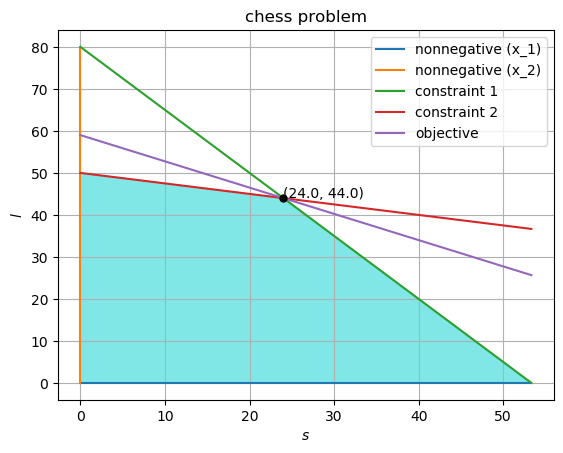

In [8]:
using PyPlot
figure();
#s = range(0, stop=50, length=10); #|> collect
#l = range(0, stop=50, length=2);

up = 80/1.5;
s = (0:0.1:1) * up
plot(s, 0 * s);   # Your first constraint
plot(0 * s, s / up * 80 );
plot(s, (160/2 .- 3*s/ 2));
plot(s, 200/4 .-s/4);

plot(s,objective_value(m) / 8 .- s*5/8 );
plot(optimal[1], optimal[2], "k.", markersize=10);    # The black dot indicite the optimal solution
text(optimal[1], optimal[2], (optimal[1], optimal[2]));           # The position of the optimal solution
fill([0, 0, optimal[1], 80/1.5, 0],[0, 200/4,  optimal[2], 0,0], color=(.5, .9, .9));     # Mark the feasible region

legend(["nonnegative (x_1)", "nonnegative (x_2)","constraint 1", "constraint 2", "objective"]);
xlabel(L"$s$"); # L = LeTeX
ylabel(L"$l$");
title("chess problem");
grid();

b). Dual

\begin{align}
\underset{\lambda_1,\lambda_2}{\text{minimize}} \qquad& 160\lambda_1 + 200\lambda_2 \\
\text{subject to:}\qquad& 3\lambda_1 + \lambda_2 \ge 5  && \text{(constraint 1)}\\
& 2\lambda_1 + 4\lambda_2 \ge 8 && \text{(constraint 2)}\\
& \lambda_1\ge 0,\,\,\lambda_2\ge 0
\end{align}

In [9]:
using Clp, JuMP;
m = Model(with_optimizer(Clp.Optimizer));
@variable(m, lambda1 >= 0);
@variable(m, lambda2 >= 0);

@constraint(m, 3*lambda1 + lambda2 >= 5);
@constraint(m, 2*lambda1 + 4*lambda2 >= 8);
@objective(m, Min, 160*lambda1 + 200*lambda2);
optimize!(m);

Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0006I 0  Obj 0 Primal inf 3.6666665 (2)
Clp0006I 2  Obj 472
Clp0000I Optimal - objective value 472
Clp0032I Optimal objective 472 - 2 iterations time 0.002


In [10]:
println("optimal -> [", value.(lambda1),",", value.(lambda2),"]");
println("the maximum profit -> ", objective_value(m))
optimal = round.([value.(lambda1),value.(lambda2)], digits = 3);
dual_optimal_value = round.(objective_value(m), digits = 3);

optimal -> [1.1999999999999997,1.4000000000000001]
the maximum profit -> 471.99999999999994


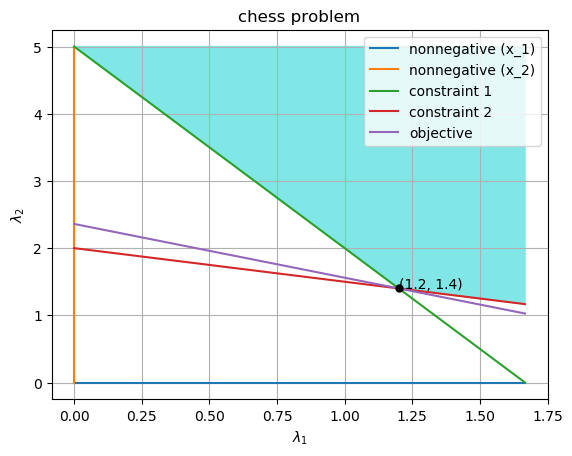

In [11]:
using PyPlot
figure();
#s = range(0, stop=50, length=10); #|> collect
#l = range(0, stop=50, length=2);

up =5/3;
s = (0:0.1:1) * up
plot(s, 0 * s);   # Your first constraint
plot(0 * s, s/up * 5  );
plot(s, (5 .- 3*s));
plot(s, 8/4 .-s/2);

plot(s,objective_value(m) / 200 .- s*160/200 );
plot(optimal[1], optimal[2], "k.", markersize=10);    # The black dot indicite the optimal solution
text(optimal[1], optimal[2], (optimal[1], optimal[2]));           # The position of the optimal solution
fill([0, optimal[1], 5/3,5/3],[5, optimal[2], 7/6,5], color=(.5, .9, .9));     # Mark the feasible region

legend(["nonnegative (x_1)", "nonnegative (x_2)","constraint 1", "constraint 2", "objective"]);
xlabel(L"$\lambda_1$"); # L = LeTeX
ylabel(L"$\lambda_2$");
title("chess problem");
grid();

In [12]:
primal_optimal_value == dual_optimal_value

true

### Conclusion:
We can see the optimals by primal and dual method is exactly the same.

## Q3. Stigler's supplement

In [13]:
## import the data
using CSV, NamedArrays;

# import Stigler's data set as a dataframe
raw = CSV.read("stigler-1.csv");

(m,n) = size(raw);  # m = number of rows, n = number of columns

n_nutrients = 2:n;      # indices of columns containing nutrients (skip the first one)
n_foods = 2:m;          # indices of rows containing food names (skip the two first ones)

nutrients = names(raw)[n_nutrients];   # the list of nutrients 
foods = raw[n_foods,1];                # the list of foods 

# Put the data about nutrients and foods into an array
data = convert(Matrix{Float64}, raw[n_foods,n_nutrients]);

# lower[i] is the minimum daily requirement of nutrient i.
lower = convert(Vector{Float64}, raw[1,n_nutrients]);


a).

\begin{align}
\underset{c_i}{\text{minimize}} \qquad& \sum_{i=1}^n{c_i} \\
\text{subject to:}\qquad& Ac \ge b  && \text{(constraint 1)}\\
& c_i\ge 0
\end{align}
A is the nutritions of the food list, and b is the required nutritions.  
With duality  
\begin{align}
\underset{\lambda}{\text{maximize}} \qquad& b^T\lambda \\
\text{subject to:}\qquad& A^T\lambda \le 1  && \text{(constraint 1)}\\
& \lambda\ge 0
\end{align}

The maximum price for the pill means the minimum of calcium I can get with 1 dollor from this pill. So if we can buy $x$ grams of calcium with one dollar, we can buy $2x$ pills. Therefore, this question is exactly asking how much calcium at least we can get from this one dollar purchase of the pills. Because this linear programming question subjects to $A^T\lambda \leq 1$, the $\lambda$ remains unchanged until $x\lambda_3 \geq 1$, where $x$ stands for the amount of calcium from the pills by one dollar.

In [14]:
# first step: get the lambdas
using JuMP, Clp;
m = Model(with_optimizer(Clp.Optimizer));

lambda = @variable(m, [1:length(lower)]);

for i = 1:length(lower)
    @constraint(m, lambda[i]>=0);
end

for i = 1:length(data[:,1])
    @constraint(m, data[i,:]' * lambda <= 1);
end

@objective(m, Max, lower' * lambda);

optimize!(m)

cost_non_pill = objective_value(m);

Coin0506I Presolve 32 (-54) rows, 9 (0) columns and 251 (-328) elements
Clp0006I 0  Obj -0 Dual inf 120.70151 (9)
Clp0006I 12  Obj 0.10866228
Clp0000I Optimal - objective value 0.10866228
Coin0511I After Postsolve, objective 0.10866228, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.1086622782 - 12 iterations time 0.002, Presolve 0.00


In [15]:
min_cal = 1 / value.(lambda[3]); 
# In order to lower the total cost, 
#this is the minimum amount of calcium you should get by one dollar from the pill!

price = 1 / (min_cal / 0.5);
# min_cal/0.5 is the number of pills you can buy with 1 dollar
println("The most I would be willing to pay is \$", round.(price,digits = 4), "/pill.");

The most I would be willing to pay is $0.0159/pill.


#### Answer:  The most I would pay is 0.0159 dollars per pill.

b).

In [16]:
ca_pill = zeros((1,length(data[1,:])));
ca_pill[3] = 1/0.01 * 0.5; ## how much calcium in 1 buck
A_pill = [data;ca_pill];

In [17]:
using JuMP, Clp;
m = Model(with_optimizer(Clp.Optimizer));


## dual!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#=
lambda = @variable(m, [1:length(lower)]);

for i = 1:length(lower)
    @constraint(m, lambda[i]>=0);
end

A_pill = [data;ca_pill];

for i = 1:length(A_pill[:,1])
    @constraint(m, A_pill[i,:]' * lambda <= 1);
end

@objective(m, Max, lower' * lambda);
=#

## primal!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

n_food = @variable(m, [1:length(A_pill[:,1])]);
for i = 1 : length(A_pill[:,1])
    @constraint(m,n_food[i] >= 0);
end

for j = 1:length(A_pill[1,:])
    @constraint(m,n_food' * A_pill[:,j]>=lower[j] );
end

@objective(m, Min, sum(n_food))
optimize!(m)

cost_w_pill = objective_value(m);

foods_w_pill = [foods;"Calcium pill"];
diets = round.(value.(n_food), digits = 3);
diets = reshape(diets, (length(diets),1));

table = NamedArray(diets,(foods_w_pill, ["dollars"]),("nutrients","amount"));

Coin0506I Presolve 9 (-78) rows, 77 (-1) columns and 570 (-79) elements
Clp0006I 0  Obj 0 Primal inf 4.7027054 (9)
Clp0006I 5  Obj 0.10136506
Clp0000I Optimal - objective value 0.10136506
Coin0511I After Postsolve, objective 0.10136506, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 0.1013650613 - 5 iterations time 0.002, Presolve 0.00


In [18]:
println("The optimal diets is ->");
for i = 1: length(diets)
    println(foods_w_pill[i]," -> ", diets[i]);
end

The optimal diets is ->
Wheat Flour (Enriched) -> 0.066
Macaroni -> 0.0
Wheat Cereal (Enriched) -> 0.0
Corn Flakes -> 0.0
Corn Meal -> 0.0
Hominy Grits -> 0.0
Rice -> 0.0
Rolled Oats -> 0.0
White Bread (Enriched) -> 0.0
Whole Wheat Bread -> 0.0
Rye Bread -> 0.0
Pound Cake -> 0.0
Soda Crackers -> 0.0
Milk -> 0.0
Evaporated Milk (can) -> 0.0
Butter -> 0.0
Oleomargarine -> 0.0
Eggs -> 0.0
Cheese (Cheddar) -> 0.0
Cream -> 0.0
Peanut Butter -> 0.0
Mayonnaise -> 0.0
Crisco -> 0.0
Lard -> 0.0
Sirloin Steak -> 0.0
Round Steak -> 0.0
Rib Roast -> 0.0
Chuck Roast -> 0.0
Plate -> 0.0
Liver (Beef) -> 0.008
Leg of Lamb -> 0.0
Lamb Chops (Rib) -> 0.0
Pork Chops -> 0.0
Pork Loin Roast -> 0.0
Bacon -> 0.0
Ham, smoked -> 0.0
Salt Pork -> 0.0
Roasting Chicken -> 0.0
Veal Cutlets -> 0.0
Salmon, Pink (can) -> 0.0
Apples -> 0.0
Bananas -> 0.0
Lemons -> 0.0
Oranges -> 0.0
Green Beans -> 0.0
Cabbage -> 0.011
Carrots -> 0.0
Celery -> 0.0
Lettuce -> 0.0
Onions -> 0.0
Potatoes -> 0.0
Spinach -> 0.004
Sweet Pota

In [19]:
println("The minimum cost (annual) with pills -> \$", round(cost_w_pill * 365, digits = 3));
println("The minimum cost (annual) without pills -> \$", round(cost_non_pill * 365, digits = 3));

The minimum cost (annual) with pills -> $36.998
The minimum cost (annual) without pills -> $39.662


#### Answer: The current cost is 37 dollars, while the previous cost is 39.66 dollars.